In [0]:
import utils

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.2.0


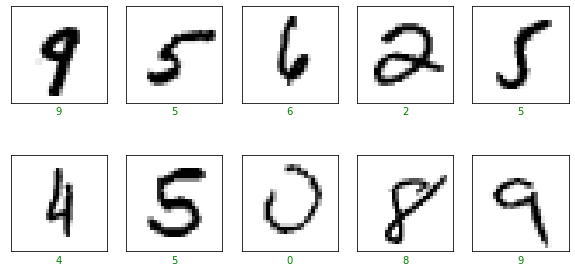

In [5]:
(x_train, y_train), (x_test, y_test) = utils.load_data()

utils.plot_random_examples(x_train, y_train).show()


In [0]:
#Create a class for a custom layer we are going to implement - called Parametric ReLU

class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='minimum', 
            shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha * tf.minimum(0., x)


In [11]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if not use_prelu:
        model.add(tf.keras.layers.ReLU())
    else:
        model.add(ParametricRelu())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [12]:
print('Initial alpha:', model.layers[1].get_weights())

h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

print('Final alpha:', model.layers[1].get_weights())

Initial alpha: [array([0.], dtype=float32)]
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9198 - val_loss: 0.1481 - val_accuracy: 0.9563
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1225 - accuracy: 0.9645 - val_loss: 0.1175 - val_accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.1060 - val_accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.0947 - val_accuracy: 0.9717
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9826 - val_loss: 0.0964 - val_accuracy: 0.9713
Final alpha: [array([-0.89379305], dtype=float32)]


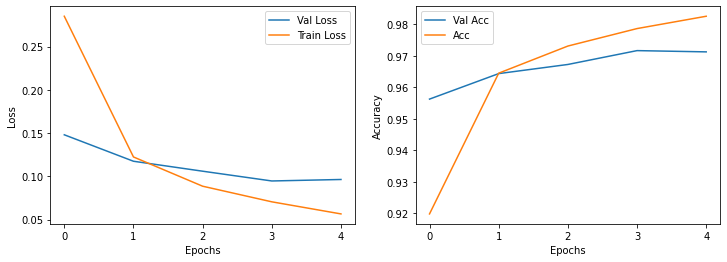

In [13]:
utils.plot_results(h).show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9162 - val_loss: 0.1648 - val_accuracy: 0.9512
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1450 - accuracy: 0.9572 - val_loss: 0.1230 - val_accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1074 - accuracy: 

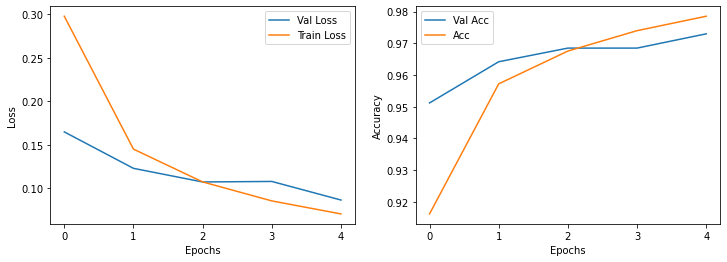

In [14]:
model = create_model(use_prelu=False)
#Comparison with Relu
model.summary()
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

utils.plot_results(h).show()